In [1]:
#
# Colate all previous work into a single Batch with minimal output
#   executing work for Deliverable 1
#
#     Preprocessing Data for a Neural Network Model
#



# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf



In [2]:
# 1. Import and read the charity_data.csv.
application_df = pd.read_csv("Resources/charity_data.csv")
#application_df.head()



# 2. Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(["EIN","NAME"], axis=1, inplace=True)



# 4a. Look at APPLICATION_TYPE value counts for binning
application_counts = application_df.APPLICATION_TYPE.value_counts()
#application_counts



# 6a. Determine which values to replace if counts are less than ...? 250?
replace_application = list(application_counts[application_counts < 250].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
#application_df.APPLICATION_TYPE.value_counts()

# 4b. Look at CLASSIFICATION value counts for binning
classification_counts = application_df.CLASSIFICATION.value_counts()
#classification_counts



# 6b. Determine which values to replace if counts are less than ..?
replace_class = list(classification_counts[classification_counts<1800].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
#application_df.CLASSIFICATION.value_counts()



# 7. Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [4]:
# 8. Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names_out(application_cat)
#encode_df.head()


In [5]:
# 9. Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df, left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
#application_df.head()



# 10. Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop("IS_SUCCESSFUL",1).values

# 11. Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)



# 12. 
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)




C:\ProgramData\Anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  # Remove the CWD from sys.path while we load stuff.


In [6]:
# Deliverable 2 Work
#     Compile, Train, and Evaluate the Model
#
# 2. Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#        9 columns(ORIG)*3 27
number_input_features = len(X_train[0])   #encoded columns 43  *  2 = 86
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# 3. First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# 4. Second hidden layer
nn.add(

# For Deliverable 3 I am changing this hidden layer from relu to tanh

    tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh")
)

# 5. Output layer
nn.add(
    tf.keras.layers.Dense(units=1, activation="sigmoid")
)

print("For Deliverable 3-attempt 1. I have changed the second hidden layer from relu to tanh")



For Deliverable 3-attempt 1. I have changed the second hidden layer from relu to tanh


In [7]:

# 6. Check the structure of the model
nn.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                3520      
                                                                 
 dense_1 (Dense)             (None, 30)                2430      
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 5,981
Trainable params: 5,981
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/D3-Att1_weights.{epoch:02d}.hdf5"

# 7a. Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# 8.
# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=False,
    save_freq='epoch',
    period=5  #set to 5 instead of default of 1
)

# 7b. Train the model
fit_model = nn.fit(X_train,y_train,epochs=100,callbacks=[cp_callback])

Epoch 1/100
804/804 [==============================] - 1s 876us/step - loss: 0.6951 - accuracy: 0.5277
Epoch 2/100
804/804 [==============================] - 1s 862us/step - loss: 0.6918 - accuracy: 0.5293
Epoch 3/100
804/804 [==============================] - 1s 878us/step - loss: 0.6918 - accuracy: 0.5281
Epoch 4/100
804/804 [==============================] - 1s 901us/step - loss: 0.6919 - accuracy: 0.5310
Epoch 5/100
804/804 [==============================] - ETA: 0s - loss: 0.6917 - accuracy: 0.5300
Epoch 5: saving model to checkpoints\D3-Att1_weights.05.hdf5
804/804 [==============================] - 1s 908us/step - loss: 0.6917 - accuracy: 0.5300
Epoch 6/100
804/804 [==============================] - 1s 897us/step - loss: 0.6920 - accuracy: 0.5312
Epoch 7/100
804/804 [==============================] - 1s 870us/step - loss: 0.6916 - accuracy: 0.5293
Epoch 8/100
804/804 [==============================] - 1s 869us/step - loss: 0.6918 - accuracy: 0.5301
Epoch 9/100
804/804 [=========

804/804 [==============================] - 1s 855us/step - loss: 0.6917 - accuracy: 0.5306
Epoch 62/100
804/804 [==============================] - 1s 875us/step - loss: 0.6918 - accuracy: 0.5315
Epoch 63/100
804/804 [==============================] - 1s 889us/step - loss: 0.6919 - accuracy: 0.5299
Epoch 64/100
804/804 [==============================] - 1s 843us/step - loss: 0.6916 - accuracy: 0.5259
Epoch 65/100
748/804 [==========================>...] - ETA: 0s - loss: 0.6916 - accuracy: 0.5308
Epoch 65: saving model to checkpoints\D3-Att1_weights.65.hdf5
804/804 [==============================] - 1s 828us/step - loss: 0.6917 - accuracy: 0.5304
Epoch 66/100
804/804 [==============================] - 1s 938us/step - loss: 0.6917 - accuracy: 0.5278
Epoch 67/100
804/804 [==============================] - 1s 849us/step - loss: 0.6919 - accuracy: 0.5272
Epoch 68/100
804/804 [==============================] - 1s 922us/step - loss: 0.6915 - accuracy: 0.5298
Epoch 69/100
804/804 [============

<AxesSubplot:>

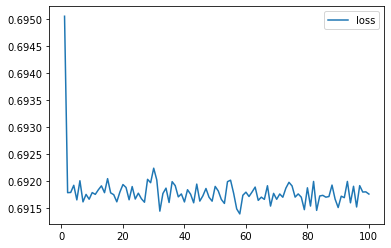

In [9]:
#
# Extra info, I like visualizations
#
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

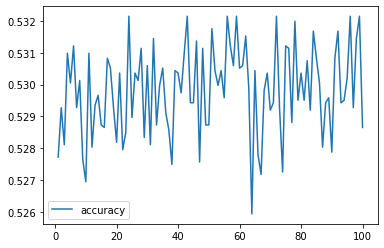

In [10]:
#
# Extra info, I like visualizations
#
# Plot the accuracy
history_df.plot(y="accuracy")

In [11]:
# 9. Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.7291 - accuracy: 0.4779 - 261ms/epoch - 972us/step
Loss: 0.7290642261505127, Accuracy: 0.4779008626937866


In [12]:
# 10. Export our model to HDF5 file
nn.save("D3-Att1_trained_attrition.h5")

In [15]:
# DELIVERABLE 3 ATTEMPT 2

# 1. Import and read the charity_data.csv.
application_df = pd.read_csv("Resources/charity_data.csv")
#application_df.head()



# for a second attempt we are going to drop the column
#     SPECIAL_CONSIDERATIONS



# 2. Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(["EIN","NAME"], axis=1, inplace=True)


# DELIVERABLE 3 ATTEMPT 2 - DROP A COLUMN / Noisy variables are removed
# I choose SPECIAL_CONSIDERATIONS, they are uncodified decision data, so they are hard to use.


application_df.SPECIAL_CONSIDERATIONS.value_counts()

N    34272
Y       27
Name: SPECIAL_CONSIDERATIONS, dtype: int64

In [16]:
application_df.drop(["SPECIAL_CONSIDERATIONS"], axis=1, inplace=True)



# 4a. Look at APPLICATION_TYPE value counts for binning
application_counts = application_df.APPLICATION_TYPE.value_counts()
#application_counts



# 6a. Determine which values to replace if counts are less than ...? 250?
replace_application = list(application_counts[application_counts < 250].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
#application_df.APPLICATION_TYPE.value_counts()

# 4b. Look at CLASSIFICATION value counts for binning
classification_counts = application_df.CLASSIFICATION.value_counts()
#classification_counts



# 6b. Determine which values to replace if counts are less than ..?
replace_class = list(classification_counts[classification_counts<1800].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
#application_df.CLASSIFICATION.value_counts()



# 7. Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT']

In [17]:
# 8. Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names_out(application_cat)
#encode_df.head()

# 9. Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df, left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
#application_df.head()



# 10. Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop("IS_SUCCESSFUL",1).values

# 11. Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)



# 12. 
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)




C:\ProgramData\Anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  del sys.path[0]
C:\ProgramData\Anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


In [18]:
# Deliverable 2 Work
#     Compile, Train, and Evaluate the Model
#
# 2. Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#        9 columns(ORIG)*3 27
number_input_features = len(X_train[0])   #encoded columns 43  *  2 = 86
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# 3. First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# 4. Second hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu")
)

# 5. Output layer
nn.add(
    tf.keras.layers.Dense(units=1, activation="sigmoid")
)



# 6. Check the structure of the model
nn.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 80)                3360      
                                                                 
 dense_4 (Dense)             (None, 30)                2430      
                                                                 
 dense_5 (Dense)             (None, 1)                 31        
                                                                 
Total params: 5,821
Trainable params: 5,821
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/D3-Att2_weights.{epoch:02d}.hdf5"

# 7a. Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# 8.
# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=False,
    save_freq='epoch',
    period=5  #set to 5 instead of default of 1
)

# 7b. Train the model
fit_model = nn.fit(X_train,y_train,epochs=100,callbacks=[cp_callback])

Epoch 1/100
804/804 [==============================] - 1s 876us/step - loss: 38536.6914 - accuracy: 0.4874
Epoch 2/100
804/804 [==============================] - 1s 886us/step - loss: 33882.9102 - accuracy: 0.5090
Epoch 3/100
804/804 [==============================] - 1s 869us/step - loss: 19932.1094 - accuracy: 0.5022
Epoch 4/100
804/804 [==============================] - 1s 885us/step - loss: 10296.0557 - accuracy: 0.5007
Epoch 5/100
745/804 [==========================>...] - ETA: 0s - loss: 6178.8120 - accuracy: 0.5060
Epoch 5: saving model to checkpoints\D3-Att2_weights.05.hdf5
804/804 [==============================] - 1s 899us/step - loss: 5804.3052 - accuracy: 0.5057
Epoch 6/100
804/804 [==============================] - 1s 862us/step - loss: 9246.6387 - accuracy: 0.5096
Epoch 7/100
804/804 [==============================] - 1s 870us/step - loss: 4776.0376 - accuracy: 0.5037
Epoch 8/100
804/804 [==============================] - 1s 868us/step - loss: 1692.3356 - accuracy: 0.5321

804/804 [==============================] - 1s 839us/step - loss: 0.6911 - accuracy: 0.5321
Epoch 62/100
804/804 [==============================] - 1s 933us/step - loss: 0.6911 - accuracy: 0.5321
Epoch 63/100
804/804 [==============================] - 1s 874us/step - loss: 0.6911 - accuracy: 0.5321
Epoch 64/100
804/804 [==============================] - 1s 840us/step - loss: 0.6911 - accuracy: 0.5321
Epoch 65/100
804/804 [==============================] - ETA: 0s - loss: 0.6911 - accuracy: 0.5321
Epoch 65: saving model to checkpoints\D3-Att2_weights.65.hdf5
804/804 [==============================] - 1s 900us/step - loss: 0.6911 - accuracy: 0.5321
Epoch 66/100
804/804 [==============================] - 1s 847us/step - loss: 0.6911 - accuracy: 0.5321
Epoch 67/100
804/804 [==============================] - 1s 886us/step - loss: 0.6911 - accuracy: 0.5321
Epoch 68/100
804/804 [==============================] - 1s 864us/step - loss: 0.6911 - accuracy: 0.5321
Epoch 69/100
804/804 [============

<AxesSubplot:>

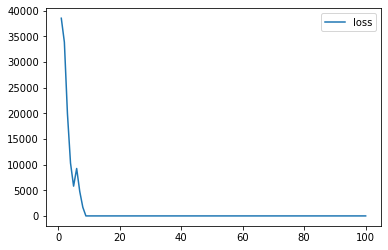

In [20]:
#
# Extra info, I like visualizations
#
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

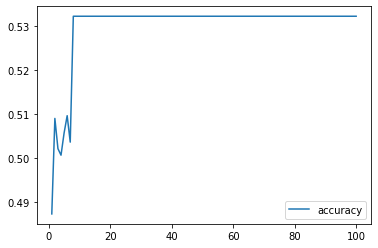

In [21]:
#
# Extra info, I like visualizations
#
# Plot the accuracy
history_df.plot(y="accuracy")

In [22]:
# 9. Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.6094 - accuracy: 0.6920 - 235ms/epoch - 876us/step
Loss: 0.6094032526016235, Accuracy: 0.6920116543769836


In [23]:
# 10. Export our model to HDF5 file
nn.save("D3-Att2_trained_attrition.h5")

In [26]:
len(X_train[0])

41

In [ ]:
#Building on attempt two's removal of noisy data, 
# Attempt 3 - now we add more layers and neurons.

In [30]:
# Deliverable 2 Work
#     Compile, Train, and Evaluate the Model
#
# 2. Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#        9 columns(ORIG)*3 27
number_input_features = len(X_train[0])   #encoded columns 41  *  2 = 82
hidden_nodes_layer1 = 123
hidden_nodes_layer2 = 82
hidden_nodes_layer3 = 12

nn = tf.keras.models.Sequential()

# 3. First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# 4. Second hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu")
)

nn.add(  # Adding a new third layer
    tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu")
)

# 5. Output layer
nn.add(
    tf.keras.layers.Dense(units=1, activation="sigmoid")
)



# 6. Check the structure of the model
nn.summary()



Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 123)               5166      
                                                                 
 dense_11 (Dense)            (None, 82)                10168     
                                                                 
 dense_12 (Dense)            (None, 12)                996       
                                                                 
 dense_13 (Dense)            (None, 1)                 13        
                                                                 
Total params: 16,343
Trainable params: 16,343
Non-trainable params: 0
_________________________________________________________________


In [31]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/D3-Att3_weights.{epoch:02d}.hdf5"

# 7a. Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# 8.
# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=False,
    save_freq='epoch',
    period=5  #set to 5 instead of default of 1
)

# 7b. Train the model
# we have a robust model so I am dropping the epochs to 25
fit_model = nn.fit(X_train,y_train,epochs=25,callbacks=[cp_callback])

Epoch 1/25
804/804 [==============================] - 1s 1ms/step - loss: 1101.5570 - accuracy: 0.5286
Epoch 2/25
804/804 [==============================] - 1s 1ms/step - loss: 0.6912 - accuracy: 0.5321
Epoch 3/25
804/804 [==============================] - 1s 973us/step - loss: 0.6911 - accuracy: 0.5321
Epoch 4/25
804/804 [==============================] - 1s 937us/step - loss: 0.6911 - accuracy: 0.5321
Epoch 5/25
778/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5315
Epoch 5: saving model to checkpoints\D3-Att3_weights.05.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.6911 - accuracy: 0.5321
Epoch 6/25
804/804 [==============================] - 1s 966us/step - loss: 0.6911 - accuracy: 0.5321
Epoch 7/25
804/804 [==============================] - 1s 975us/step - loss: 0.6911 - accuracy: 0.5321
Epoch 8/25
804/804 [==============================] - 1s 1ms/step - loss: 0.6911 - accuracy: 0.5321
Epoch 9/25
804/804 [=======================

<AxesSubplot:>

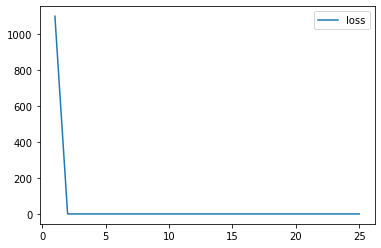

In [32]:
#
# Extra info, I like visualizations
#
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

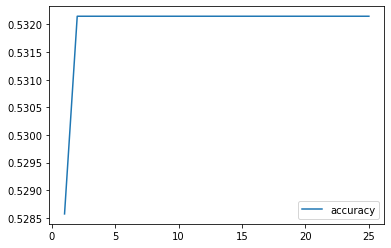

In [33]:
#
# Extra info, I like visualizations
#
# Plot the accuracy
history_df.plot(y="accuracy")

In [34]:
# 9. Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.6981 - accuracy: 0.5237 - 228ms/epoch - 851us/step
Loss: 0.6980611681938171, Accuracy: 0.5237317681312561


In [35]:
# 10. Export our model to HDF5 file
nn.save("D3-Att3_trained_attrition.h5")